In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import interpolate

# Read data from mesa data: 
a = pd.read_excel("ONe6040_helm_update.xlsx")

# Read data after the initial module
f = open("ecsn.temp1p4.hse.25600","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')
#for i in range(len(data2d)-1,-1,-1):
#    if len(data2d[i]) == 3:
##        aaaaa = data2d[i].copy()
#        data2d.pop(i)
#        i+=1
#    else:
#        data2d[i].extend(aaaaa)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f20','he4','al27','si28','s32','p31','h1']
df.head(2)

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1
0,3906.25,8.348567e+09,6.565869e+08,7.352021e+27,1.866724e-08,0.6,0.4,8.904570e-13,5.156893e-12,1.000000e-20,1.000000e-20,6.927175e-08,1.000000e-20,1.000000e-20,1.000000e-20
1,11718.75,8.348566e+09,6.565869e+08,7.352020e+27,1.926777e-08,0.6,0.4,8.908848e-13,5.157993e-12,1.000000e-20,1.000000e-20,6.928641e-08,1.000000e-20,1.000000e-20,1.000000e-20


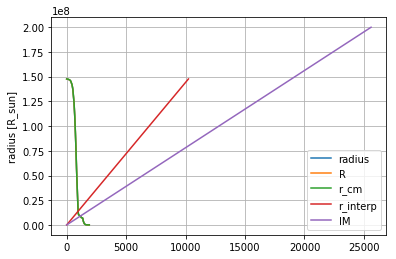

In [4]:
r_sun = 6.955e10  # cm
m_sun = 1.989e33  # gram
radius = np.array(a["radius"])
R = np.power(10,np.array(a["logR"]))
r_cm = np.array(a["radius_cm"])

r_interp = np.linspace(radius[-1], radius[ 0], 10240)

plt.plot(radius*r_sun, label='radius')
plt.plot(R*r_sun, label='R')
plt.plot(r_cm, label='r_cm')
plt.plot(r_interp*r_sun, label='r_interp')


plt.plot(np.array(df['radius']), label='IM')
#plt.plot(df1['radius'],label='rm_plateo')


plt.legend()
plt.xlabel("")
plt.ylabel("radius [R_sun]")
plt.grid()
plt.show()

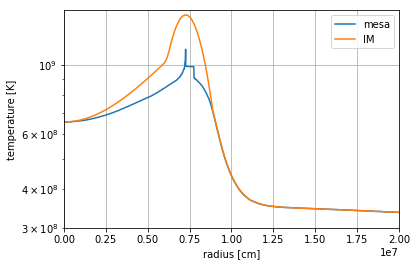

In [5]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

#T_interp = np.interp(r_interp, radius[::-1], temp[::-1])
f_interp = interpolate.interp1d(radius[::-1],temp[::-1],kind='nearest')
T_interp = f_interp(r_interp)

plt.semilogy(radius*r_sun,temp,'-',label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df['temperature']), "-",label='IM')
#plt.plot(r_interp*r_sun,T_interp,'s-',label='interp')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")

plt.xlim(0,2e7)
#plt.xlim(585937.5,1367187.5)
#plt.xlim(0,4.1e7)
plt.ylim(3e8,1.5e9)
plt.grid()
plt.legend()
plt.show()

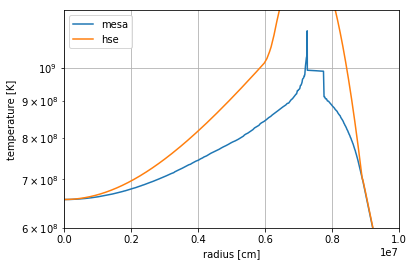

In [6]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

T_interp = np.interp(r_interp, radius[::-1], temp[::-1])

plt.semilogy(radius*r_sun,temp,'-', label='mesa')
#plt.semilogy(R*r_sun,T,":")
#plt.semilogy(r_interp,T_interp)

plt.semilogy(np.array(df['radius']),np.array(df['temperature']), "-",label='hse')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")
#plt.xlim(7.2e6,8e6)
#plt.xlim(585937.5,1367187.5)
plt.ylim(0.6e9,1.2e9)
plt.xlim(0.4,1e7)
plt.legend()
plt.grid()
#plt.show()
plt.savefig("temp_initial model")

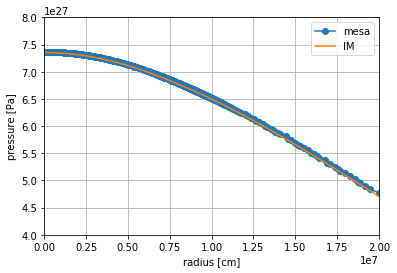

In [7]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.plot(R*r_sun,pressure, "o-",label='mesa')
#plt.plot(R*r_sun,P)
#plt.plot(r_interp*r_sun,p_interp)

plt.plot(np.array(df['radius']),np.array(df['pressure']),"-",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")

plt.xlim(0,2e7)
plt.ylim(4e27,8e27)
#plt.xlim(7.2e6,8e6)
#plt.ylim(0.88e9,1.2e9)
plt.legend()
plt.grid()
#plt.show()
#plt.savefig("pressure_initial_model")

In [ ]:
pressure = np.array(a['pressure'])
P = np.power(10,np.array(a["logP"]))

p_interp = np.interp(r_interp, radius[::-1], pressure[::-1])

plt.semilogy(R*r_sun,pressure,label='mesa')
#plt.semilogy(R*r_sun,P)
#plt.semilogy(r_interp*r_sun,p_interp)

plt.semilogy(np.array(df['radius']),np.array(df['pressure']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("pressure [Pa]")
plt.legend()
#plt.ylim(5e20,2e28)
plt.grid()
plt.show()

In [ ]:
rho = np.power(10,np.array(a["logRho"]))

plt.plot(radius*r_sun,rho,label='mesa')

plt.plot(np.array(df['radius']),np.array(df['density']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.legend()
plt.grid()
plt.show()

In [ ]:
plt.semilogy(radius*r_sun,rho,label='mesa')

plt.semilogy(np.array(df['radius']),np.array(df['density']), ":",label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("density [g/cm3]")
plt.grid()
plt.legend()
plt.show()

In [ ]:
element = 'ne20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0e6,20e6)
#plt.xlim(7.2e6,8e6)
plt.grid()
plt.legend()
plt.show()

In [ ]:
element = 'o16'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
#plt.xlim(585937.5,1367187.5)
plt.xlim(0e6,20e6)
plt.grid()
plt.legend()
plt.show()

In [ ]:
element = 'o20'

y_axis = np.array(a[element])

plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0e6,20e6)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

In [ ]:
element = 'h1'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(2e6,12e6)
plt.grid()
plt.legend()
plt.savefig("X(h1).png")

In [ ]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0,2e7)
plt.ylim(1e-24,1e-16)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

In [ ]:
element = 'he4'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,'o-',label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.xlim(0,2.e7)
#plt.xlim(0,0.25e7)
plt.ylim(1e-21,1e-16)
plt.savefig("X(he4).png")

In [ ]:
element = 'f20'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0,0.2e8)
plt.ylim(1e-12,1e-6)
plt.grid()
plt.legend()
plt.savefig("X(f20).png")

In [ ]:
element = 'mg24'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.xlim(0,0.2e8)
plt.ylim(1e-20,1e-6)
plt.legend()
plt.savefig("X(mg24).png")

In [ ]:
element = 'si28'

y_axis = np.array(a[element])

plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0,0.2e8)
plt.ylim(1e-6,1e-2)
plt.grid()
plt.legend()
plt.savefig("X(si28).png")

In [ ]:
element = 'al27'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),'-',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(7.2e6,7.8e6)
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

In [ ]:
element = 's32'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
#plt.xlim(585937.5,1367187.5)
plt.grid()
plt.legend()
plt.show()

In [ ]:
element = 'p31'

#y_axis = np.array(a[element])

#plt.semilogy(radius*r_sun,y_axis,label='mesa')
plt.semilogy(np.array(df['radius']),np.array(df[element]),':',label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.grid()
plt.legend()
plt.show()

In [ ]:
df.head()

In [ ]:
df.to_csv("/Users/sailor/Desktop/asro_work/test/csv_result/rm_plateo.csv",index = False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import interpolate

# Read data from mesa data: 
a = pd.read_excel("ONe6040_helm_update.xlsx")

# Read data after the initial module
f = open("mesa.raw","r")
data = f.readlines()  # data is a list. each element is a line of "23Ne...dat"
f.close()
del data[0:16]

data2d = []
for i in range(len(data)):
    data2d.append(re.split(r"[ ]",data[i].strip('\n')))

for i in range(len(data2d)):
        while '' in data2d[i]:
            data2d[i].remove('')
#for i in range(len(data2d)-1,-1,-1):
#    if len(data2d[i]) == 3:
##        aaaaa = data2d[i].copy()
#        data2d.pop(i)
#        i+=1
#    else:
#        data2d[i].extend(aaaaa)

data3d = np.array(data2d).astype(np.float)

df = pd.DataFrame(data3d)
df.columns = ['radius','density','temperature','pressure','ne20','o16','o20','mg24','f20','he4','al27','si28','s32','p31','h1']
df.head(2)

In [ ]:
import random
a = random.random()
c = []
for i in range(1901):
    a = random.random()
    c.append(a*1.5)
df['redshift'] = c

In [17]:
df.sample(5)

,radius,density,temperature,pressure,ne20,o16,o20,mg24,f20,he4,al27,si28,s32,p31,h1,redshift
1809,1.475437e+08,1.908265e+00,1.363721e+07,9.707131e+14,0.400000,0.600000,1.000000e-99,1.000000e-99,1.000000e-99,1.000000e-99,0.0,1.000000e-99,0.0,0.0,1.000000e-99,1.390435
848,9.632417e+06,7.092884e+09,6.292364e+08,6.568495e+27,0.385351,0.600000,1.464935e-02,2.900786e-18,9.240549e-09,5.679270e-26,0.0,1.679440e-12,0.0,0.0,1.898524e-51,0.380587
48,8.514151e+03,8.348567e+09,8.294945e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964980e-16,2.021112e-09,8.924886e-23,0.0,3.520160e-06,0.0,0.0,1.211485e-42,0.728693
929,1.251648e+07,6.719407e+09,4.437553e+08,6.127409e+27,0.399788,0.600000,2.123262e-04,4.290818e-23,2.341032e-10,3.387557e-29,0.0,1.039397e-15,0.0,0.0,0.000000e+00,0.371452
389,9.076001e+05,8.340357e+09,8.353148e+08,7.359461e+27,0.007998,0.599994,3.920042e-01,6.678174e-16,2.200181e-09,1.041791e-22,0.0,3.878754e-06,0.0,0.0,0.000000e+00,1.320550


In [27]:
dff = pd.DataFrame(data=df['radius'],columns=['radius'])
dff["density"] = df.density
dff["temperature"] = df.temperature
dff["redshift"] = df.redshift
dff["luminosity"] = df.pressure
dff["ne20"] = df.ne20
dff["o16"] = df.o16
dff["o20"] = df.o20
dff["mg24"] = df.mg24
dff["f20"] = df.f20
dff["al27"] = df.al27
dff["si28"] = df.si28
dff["s32"] = df.s32
dff["p31"] = df.p31
dff["h1"] = df.h1
dff["fe56"] = df.mg24*2

dff.sample(5)

,radius,density,temperature,redshift,luminosity,ne20,o16,o20,mg24,f20,al27,si28,s32,p31,h1,fe56
565,7.080374e+06,7.664834e+09,1.194043e+09,0.129205,6.908297e+27,0.177367,0.596819,2.236514e-01,5.215945e-10,7.742038e-08,0.0,1.941427e-03,0.0,0.0,0.000000e+00,1.043189e-09
1180,9.729540e+07,6.806588e+07,2.318429e+08,0.411929,1.249889e+25,0.400000,0.600000,1.000000e-99,3.068759e-30,1.000000e-99,0.0,6.390175e-30,0.0,0.0,0.000000e+00,6.137518e-30
711,8.284176e+06,7.342817e+09,1.075232e+09,1.001268,6.755519e+27,0.307229,0.599812,9.281684e-02,3.806702e-11,4.354057e-08,0.0,1.188430e-04,0.0,0.0,0.000000e+00,7.613403e-11
1502,1.439512e+08,2.559602e+04,1.923242e+08,0.756670,1.992864e+20,0.400000,0.600000,1.000000e-99,8.471322e-79,1.000000e-99,0.0,4.917732e-64,0.0,0.0,0.000000e+00,1.694264e-78
779,9.002444e+06,7.187009e+09,8.496449e+08,0.442606,6.657803e+27,0.364945,0.600000,3.505468e-02,3.364822e-14,1.960781e-08,0.0,2.788057e-08,0.0,0.0,1.568653e-46,6.729644e-14


In [32]:
import random
a = random.random()
c = []

for i in range(5):
        a = random.random()
        c.append(a)

dfff = pd.DataFrame(data=c,columns=['CaII'])

for j in range(1000):
    c = []
    b = random.random()
    for i in range(5):
        a = random.random()
        c.append(a*b)
    dfff[str(j)] = c

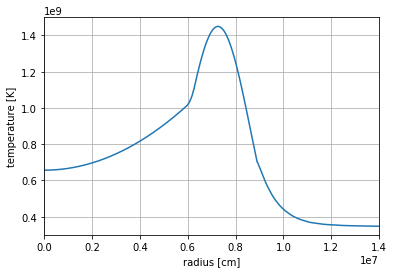

In [7]:
temp = np.array(a["temperature"])
T = np.power(10,np.array(a["logT"]))

#T_interp = np.interp(r_interp, radius[::-1], temp[::-1])
f_interp = interpolate.interp1d(radius[::-1],temp[::-1],kind='nearest')
T_interp = f_interp(r_interp)

#plt.semilogy(radius*r_sun,temp,'-',label='mesa')
plt.plot(np.array(df['radius']),np.array(df['temperature']), "-",label='IM')
#plt.plot(r_interp*r_sun,T_interp,'s-',label='interp')

plt.xlabel("radius [cm]")
plt.ylabel("temperature [K]")

plt.xlim(0,1.4e7)
#plt.xlim(585937.5,1367187.5)
#plt.xlim(0,4.1e7)
plt.ylim(3e8,1.5e9)
plt.grid()
#plt.legend()
plt.show()

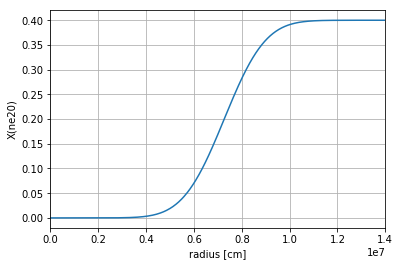

In [15]:
element = 'ne20'

y_axis = np.array(a[element])

#plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0e6,14e6)
#plt.xlim(7.2e6,8e6)
plt.grid()
#plt.legend()
plt.show()

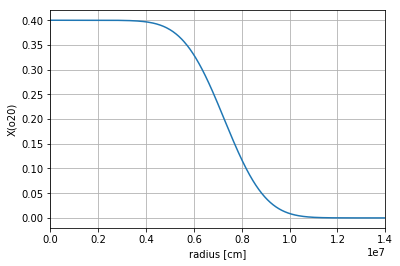

In [14]:
element = 'o20'

y_axis = np.array(a[element])

#plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0e6,14e6)
#plt.xlim(7.2e6,8e6)
plt.grid()
#plt.legend()
plt.show()

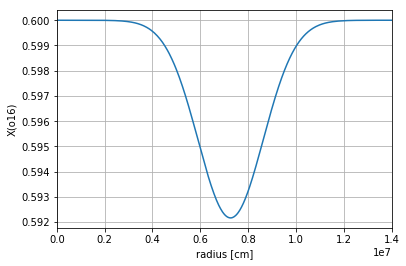

In [13]:
element = 'o16'

y_axis = np.array(a[element])

#plt.plot(radius*r_sun,y_axis,label='mesa')
plt.plot(np.array(df['radius']),np.array(df[element]),label='IM')

plt.xlabel("radius [cm]")
plt.ylabel("X("+element+")")
plt.xlim(0e6,14e6)
#plt.xlim(7.2e6,8e6)
plt.grid()
#plt.legend()
plt.show()